(1000, 1) (1000, 1)


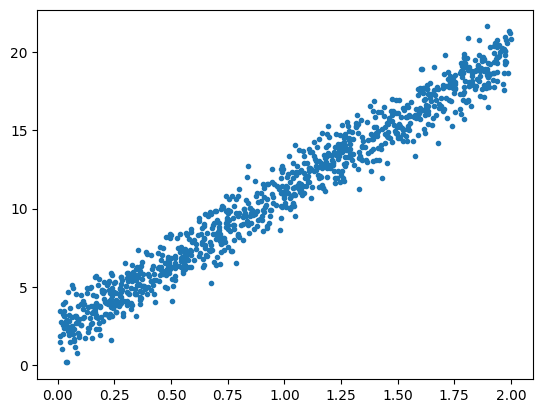

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed(42)
samples = 1000

X = 2*np.random.rand(samples, 1)
epsilon = np.random.normal(0,1, size=(samples,1))

print(epsilon.shape, X.shape)

y = 2+9*X+epsilon

plt.plot(X,y, '.')

# Gradient descent

## Simulate

- $X\sim U(0,1)$
- $y = 2 + 9X + \epsilon$
- $\epsilon \sim N(0,1)$

In [10]:
# i X vill vi ha 1:or i första kolonnen.
X = np.c_[np.ones(samples), X]
X[:5], X.shape

(array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728]]),
 (1000, 2))

## Train|test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

## Batch gradient descent
* 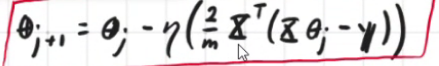
* all där förutom eta på gradient =

In [31]:
np.random.seed(42)
def gradient_descent(X, y, learning_rate=0.1, epochs=100):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)  # dimension (2,1). # {beta_0, beta_1}^T

    for _ in range(epochs):
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate*gradient #learning_rate is eta in theory
    return theta

theta = gradient_descent(X_train, y_train, epochs=1000) # vi förväntar oss att den ska nå (2,9). men det beror på epochs, learning_rate etc
theta.reshape(-1) # throws away additional dimension

array([2.20500716, 8.90206121])

In [34]:
steps = range(1, 200, 1)
thetas = np.array(
    [
        gradient_descent(X_train, y_train, epochs=epoch).reshape(-1) for epoch in steps
    ]  # .reshape(-1) kastar bort en dimension
)
thetas.shape


(199, 2)

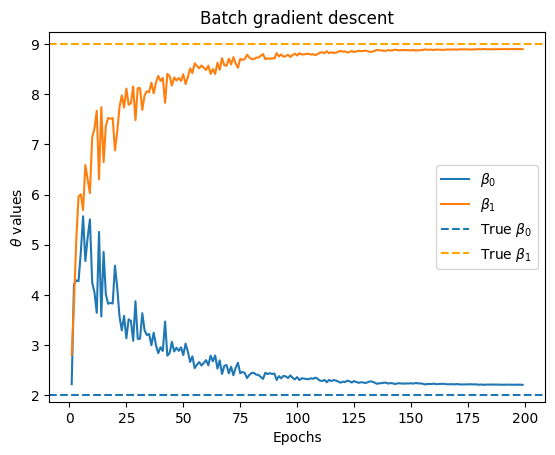

In [42]:
fig, ax = plt.figure(), plt.axes() # fler epoker, kommer närmare och närmare vårat värde
ax.plot(steps, thetas, label = [r"$\beta_0$", r"$\beta_1$"])
ax.axhline(y=2, linestyle="--", label = r"True $\beta_0$")
ax.axhline(y=9, color = "orange", linestyle="--", label = r"True $\beta_1$")
ax.set(xlabel = "Epochs", ylabel = r"$\theta$ values", title= "Batch gradient descent")
ax.legend()

## Stochastic gradient descent (SGD)
- Geron (2019) - bok

In [44]:
epochs = 10
t0, t1 = 5, 50 # learning schedule hyperparameters. minskar learning rate under längre tid. kortare och kortare steg ju längre vi tränar

def learning_rate_schedule(t):
    """Decays the learning rate as training progresses"""
    return t0/(t+t1)

theta = np.random.randn(2,1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m): # går igenom alla våra samples(datapunkter). för varje sample i träningssetet, with replacement. chans att man plockar samma
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]

        gradient = 2*x_i.T.dot(x_i.dot(theta) - y_i) # transponerar, använder en sample åt gången
        eta = learning_rate_schedule(epoch*m+i) # TODO: tänk varför man ggör så här epoch*m+i
        theta -= eta*gradient

theta, epochs


(array([[2.23974332],
        [8.9098948 ]]),
 10)

In [47]:
# Vilket värde kollar man efter? vad är man ute efter?
y_pred = X_test@theta
y_pred.shape

MAE = np.mean(np.absolute(y_test-y_pred))
MSE = np.mean((y_test-y_pred)**2)
RMSE = np.sqrt(MSE)

MAE, MSE, RMSE

(0.7689200134572878, 0.9535921313630249, 0.976520420351272)